# MAE345 HW8: Coding Lab9
## Alkin Kaz (due 11/29/2022)

# Lab 9: (Single-Layer) Neural Networks and Gradient Descent (50 Pts)

In this lab, we are going to implement gradient descent to train a simple (single-layer) neural network. We will use the [Autograd](https://github.com/HIPS/autograd) library to easily compute the gradients necessary to solve a toy learning problem.


Before we begin, we will first install the Autograd. The simplest way to do this is to run the following command in your terminal after activating the `mae345` environment.

`conda install -c conda-forge autograd`

You may need to restart Jupyter after running the command.

The main functionality Autograd offers is the ability to automatically compute gradients (hence the name!) for complicated mathematical functions. This saves a lot of time instead of having to repeatedly perform the chain rule or relying on numerical differentiation, which can be slow for functions of many variables. You can write mathematical functions using Numpy syntax and Autograd will allow  you to compute gradients. As an example, take a look at the block of code below.


In [1]:
from autograd import grad
import autograd.numpy as np

# Define a function using numpy operations 
def my_function(w,x,y):
    return np.power(w,2)*x + y

# Gradient function (partial derivative of my_function w.r.t. the first argument, i.e., w)
gradient_fun = grad(my_function) 

# Evaluate the gradient (partial derivative) of my_function with respect to w at w=w0, x=x0, y=y0
w0 = 0.5
x0 = 0.2
y0 = 0.3
print(gradient_fun(w0, x0, y0))

0.2


You can manually verify that `gradient_fun(x0, x0, y0)` evaluates the gradient of `my_function` w.r.t. the first argument of `my_function` (which is `w`) at `w0, x0, y0`. The beauty of Autograd is that `my_function` can be extremely complicated; manually computing the gradient might be very annoying, but Autograd saves you the trouble. 

Notice also above that we are not actually using numpy above. We are using autograd.numpy as if it were numpy. Autograd has overloaded a large number of numpy operations. As long as `my_function` uses these basic numpy operations, Autograd will allow you to compute gradients. You can take a look at the Autograd documentation for all the numpy functions Autograd has overloaded (but we won't need anything fancy for this assignment --- you can just pretend like autograd.numpy is numpy).

Now, we will train a single-layer neural network using gradient descent. Your task is to fill in the portions marked "TODO". 

First, let's define some helper functions.

In [2]:
# Sigmoid nonlinearity (i.e., activation)
def sigmoid(z):
    return 0.5 * (np.tanh(z / 2.) + 1)

######## TODO: Fill in these functions ################################

# Single-layer neural network (with no bias) 
def neural_network_prediction(weights, x):
    '''This function should implement a single-layer neural network. We will
    ignore the bias term here to keep things simple. This function
    should take in an input (x) and output sigmoid(w'*x). Recall that
    matrix multiplication in numpy can be done using np.dot().'''
    return sigmoid(weights.T @ x)

# Loss function: Binary Cross Entropy 
def loss_function(y_pred, y_true):
    '''Loss function: this function takes in a predicted label (scalar)
    and a true label (scalar) and outputs a scalar that quantifies how
    good the prediction is. Implement the binary cross entropy loss
    discussed in Lecture 20.'''
    return - (y_true * np.log2(y_pred) + (1-y_true) * np.log2(1-y_pred))

# Training loss
def training_loss(weights, inputs, labels):
    '''Compute the total training loss here (i.e., the loss summed
    over all the inputs in the dataset)''' 
    return np.sum(loss_function(neural_network_prediction(weights, inputs), labels))

#######################################################################

Next, we will define some training data (inputs (x) and labels (y)).

In [3]:
############ DO NOT MODIFY ############################################
# Build a toy dataset
inputs = np.array([[1.0,  0.0, 0.25, -1.0,  0.0, -0.25],
                   [0.0,  1.0, 0.3,   0.0, -1.0, -0.4]])

labels = np.array([1, 1, 1, 0, 0, 0])

Finally, we will optimize our weights to minimize the training loss using gradient descent.

In [4]:
############ DO NOT MODIFY #############################################
# Define a compiled function that returns gradients of the training loss.
# This is identical to the simple gradient example we considered at the
# very beginning of this notebook. The "jit" command does "just-in-time
# compilation". Don't worry too much about what jit is. This helps speed
# up the code. 
training_gradient_fun = grad(training_loss)
########################################################################

# Optimize weights using gradient descent
weights = np.ones(2) # Initialize the weights to the all-ones vector (this doesn't really matter.Random
# initializations are ok too.)
# Print the training loss with the initial weights
print("Initial loss:", training_loss(weights, inputs, labels))

############### TODO: Fill in code to do gradient descent ##############
step_size = 0.1
loss_arr = []
# Take gradient steps
for i in range(100):
    weights -= step_size * training_gradient_fun(weights, inputs, labels)
    loss_arr.append(training_loss(weights, inputs, labels))

# Print the training loss with the optimized weights    
print("Trained loss:", training_loss(weights, inputs, labels))

Initial loss: 3.0709128262188137
Trained loss: 0.347954059950685


Finally, the block below visualizes the outputs of the trained neural network. Note that the true labels are either 1 (plus) or 0 (dot) and the output of your single-layer neural network will also be between 0 and 1. The contour plot below shows level-sets of the neural network's predictions. The level set corresponding to 0.5 is the "decision boundary". If trained correctly, the 0.5-level set should separate the points with label equals to 1 from the points with labels equal to 0.  

Text(0.5, 1.0, 'Neural network predictions')

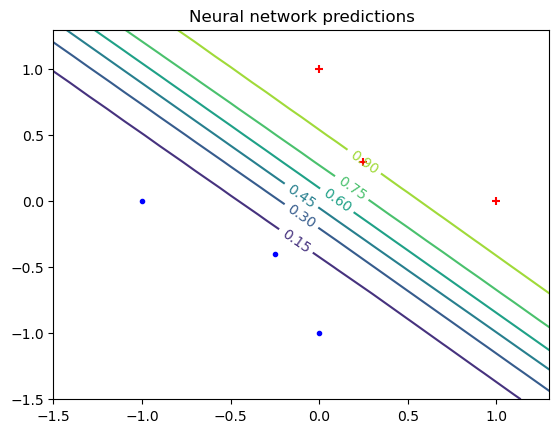

In [5]:
############ DO NOT MODIFY #############################################
import matplotlib.pyplot as plt
import numpy as npp

fig, ax = plt.subplots()
plt.scatter(inputs[0,0:3], inputs[1,0:3], c='r',marker='+')
plt.scatter(inputs[0,3:6], inputs[1,3:6], c='b',marker='.')

delta = 0.2
xs = np.arange(-1.5, 1.5, delta)
ys = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(xs, ys)

Z = npp.zeros(np.shape(X))
for i in range(0,len(xs)):
    for j in range(0,len(xs)):
        xi = np.transpose(np.array([X[i,j], Y[i,j]]))
        Z[i,j] = neural_network_prediction(weights, xi)


CS = ax.contour(X, Y, Z) 

ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Neural network predictions')

# Submission Instructions

Please submit to Gradescope "HW8: Coding" a zip including: this notebook Lab9 (50pts) along with Lab8 notebook and its two videos (50pts).
